# Model 1: Resnet50 with cropped logos

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [7]:
# re-size all the images to this
IMAGE_SIZE = [210, 210]

train='./photos/'
test='./test/'

#Import resnet model
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

  # useful for getting number of output classes
folders = glob('train/*')
folders

# our layers - you can add more if you want
x = Flatten()(resnet.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 210, 210, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 216, 216, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 105, 105, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

Found 730 images belonging to 9 classes.
Found 150 images belonging to 9 classes.
Epoch 1/50
23/23 [==============================] - 26s 919ms/step - loss: 23.4314 - accuracy: 0.1384 - val_loss: 11.0203 - val_accuracy: 0.1467
Epoch 2/50
23/23 [==============================] - 7s 312ms/step - loss: 10.7921 - accuracy: 0.1918 - val_loss: 5.8102 - val_accuracy: 0.2000
Epoch 3/50
23/23 [==============================] - 8s 330ms/step - loss: 3.7353 - accuracy: 0.2877 - val_loss: 4.2905 - val_accuracy: 0.2333
Epoch 4/50
23/23 [==============================] - 7s 316ms/step - loss: 2.4144 - accuracy: 0.3452 - val_loss: 5.1750 - val_accuracy: 0.1533
Epoch 5/50
23/23 [==============================] - 8s 342ms/step - loss: 1.9463 - accuracy: 0.4027 - val_loss: 4.7791 - val_accuracy: 0.1600
Epoch 6/50
23/23 [==============================] - 7s 305ms/step - loss: 2.3823 - accuracy: 0.3863 - val_loss: 8.7243 - val_accuracy: 0.1133
Epoch 7/50
23/23 [==============================] - 8s 330ms/s

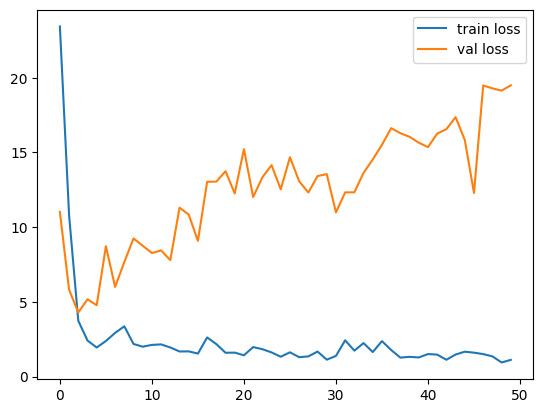

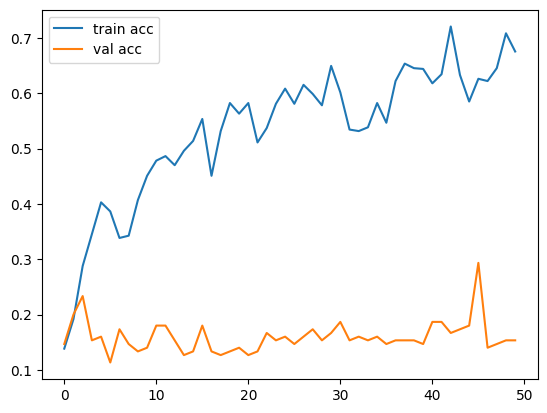

<Figure size 640x480 with 0 Axes>

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train,
                                                 target_size = (210, 210),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [10]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save(r".\Models\resnet_logo_model_final.h5")

1/1 [==============================] - 2s 2s/step
[[5.0078867e-25 4.6247901e-34 6.9212513e-12 1.0000000e+00 9.0304593e-23
  2.0612196e-21 3.1435712e-29 5.2971067e-21 3.7693270e-23]]
Nissan


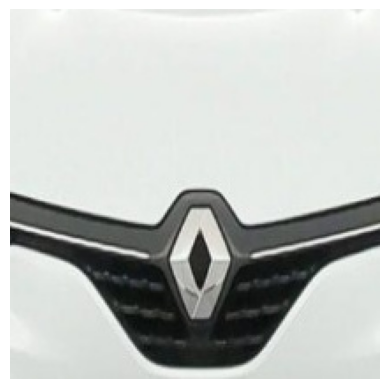

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model(r".\Models\resnet_logo_model_final.h5")
img=image.load_img(r".\photos\Renault\frontfacingRenaultcar43.jpeg",target_size=(210,210))

x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

#run model on image
r=model.predict(img_data)
print(r)
#find max probability from array
a=np.argmax(r, axis=1)
a
#print label of predicted car
# Class labels (replace with your own class labels)
class_labels = ['Ford', 'Honday', 'Hyundai', 'Nissan', 'Renault', 'Suzuki', 'Tata', 'Toyota', 'Volkswagen']

print(class_labels[a[0]])

# Display the image
plt.imshow(img)
plt.axis('off') # Remove axis ticks and labels
plt.show()


# Model 2: VGG16 Cropped Logos

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [13]:

# Set some parameters
num_classes = 9
image_size = (200, 200)

# Load the pre-trained VGG16 model with ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=image_size + (3,))

# Add a global average pooling layer and a dense layer for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with categorical cross-entropy loss and the Adam optimizer
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
# Create data generators for the training and validation data
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 # set validation split
)

train_generator = train_datagen.flow_from_directory(
    'photos',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='training' # set as training data
)

validation_generator = train_datagen.flow_from_directory(
    'test',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation' # set as validation data
)


Found 588 images belonging to 9 classes.
Found 27 images belonging to 9 classes.


In [16]:
# Train the model on the training data for 10 epochs
r=model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator, 
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12028\1445361492.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(


Epoch 1/30
18/18 [==============================] - 16s 479ms/step - loss: 2.1709 - accuracy: 0.1709
Epoch 2/30
18/18 [==============================] - 5s 280ms/step - loss: 2.0522 - accuracy: 0.2518
Epoch 3/30
18/18 [==============================] - 5s 271ms/step - loss: 2.0038 - accuracy: 0.2716
Epoch 4/30
18/18 [==============================] - 5s 282ms/step - loss: 1.9388 - accuracy: 0.3212
Epoch 5/30
18/18 [==============================] - 5s 249ms/step - loss: 1.8990 - accuracy: 0.3399
Epoch 6/30
18/18 [==============================] - 5s 250ms/step - loss: 1.8600 - accuracy: 0.3489
Epoch 7/30
18/18 [==============================] - 5s 255ms/step - loss: 1.8183 - accuracy: 0.3525
Epoch 8/30
18/18 [==============================] - 5s 263ms/step - loss: 1.7882 - accuracy: 0.3579
Epoch 9/30
18/18 [==============================] - 5s 266ms/step - loss: 1.7508 - accuracy: 0.4065
Epoch 10/30
18/18 [==============================] - 11s 600ms/step - loss: 1.6969 - accuracy: 0.45

In [17]:
# Save the trained model to a file
model.save('vgg16_model_logo_final.h5')


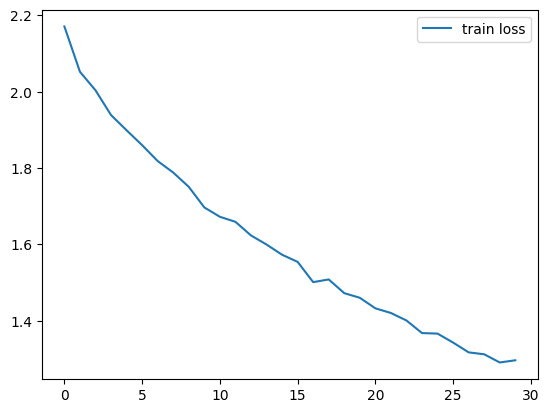

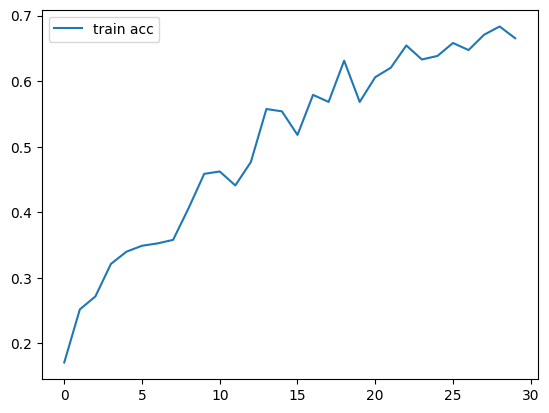

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('vgg16_model_logo_final.h5')

# Load and preprocess a new image
img_path = r".\photos\Renault\frontfacingRenaultcar43.jpeg"
img = image.load_img(img_path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make a prediction on the preprocessed image
preds = model.predict(x)

# Class labels (replace with your own class labels)
class_labels = ['Ford', 'Honday', 'Hyundai', 'Nissan', 'Renault', 'Suzuki', 'Tata', 'Toyota', 'Volkswagen']
predicted_class = class_labels[np.argmax(preds[0])]
print('Predicted class:', predicted_class)


1/1 [==============================] - 1s 1s/step
Predicted class: Renault


# Model 3: Resnet 50 on uncropped images

In [20]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [21]:
# re-size all the images to this
IMAGE_SIZE = [210, 210]

train='./train_uncropped/'
test='./test_uncropped/'

#Import resnet model
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

  # useful for getting number of output classes
folders = glob('train/*')
folders

# our layers - you can add more if you want
x = Flatten()(resnet.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [22]:
# view the structure of the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 210, 210, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 216, 216, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 105, 105, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

Found 3671 images belonging to 9 classes.
Found 921 images belonging to 9 classes.
Epoch 1/30
115/115 [==============================] - 72s 590ms/step - loss: 8.4681 - accuracy: 0.1318 - val_loss: 5.0901 - val_accuracy: 0.1162
Epoch 2/30
115/115 [==============================] - 40s 347ms/step - loss: 3.3153 - accuracy: 0.1648 - val_loss: 3.7065 - val_accuracy: 0.1303
Epoch 3/30
115/115 [==============================] - 46s 397ms/step - loss: 3.6257 - accuracy: 0.2019 - val_loss: 4.7052 - val_accuracy: 0.1564
Epoch 4/30
115/115 [==============================] - 50s 434ms/step - loss: 3.6653 - accuracy: 0.2089 - val_loss: 7.3290 - val_accuracy: 0.1097
Epoch 5/30
115/115 [==============================] - 39s 335ms/step - loss: 4.2537 - accuracy: 0.2125 - val_loss: 8.0266 - val_accuracy: 0.1585
Epoch 6/30
115/115 [==============================] - 44s 386ms/step - loss: 3.2639 - accuracy: 0.2359 - val_loss: 6.5420 - val_accuracy: 0.1553
Epoch 7/30
115/115 [===========================

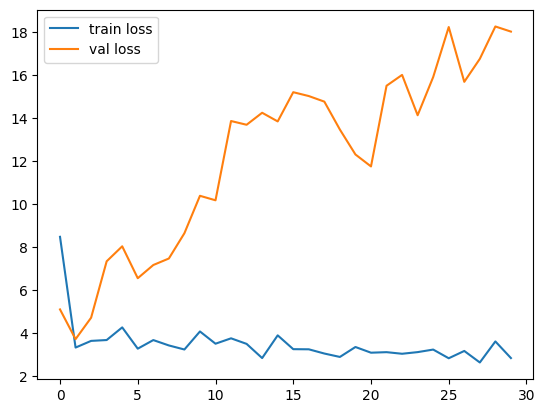

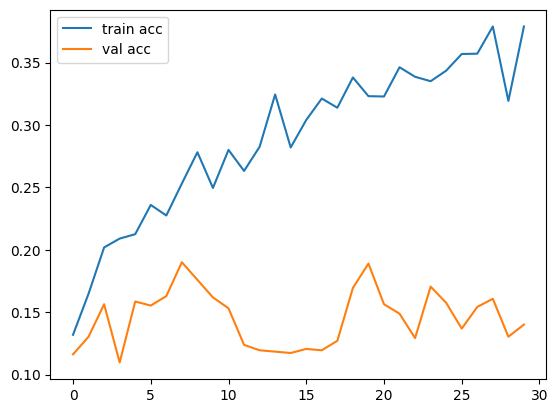

<Figure size 640x480 with 0 Axes>

In [23]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train,
                                                 target_size = (210, 210),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50_uncropped_final.h5')

1/1 [==============================] - 1s 1s/step
[[1.3700483e-30 2.5129960e-35 9.9998844e-01 1.1612082e-05 3.4334623e-13
  5.5021704e-23 1.0192687e-14 6.2862218e-14 4.7391900e-15]]
Hyundai


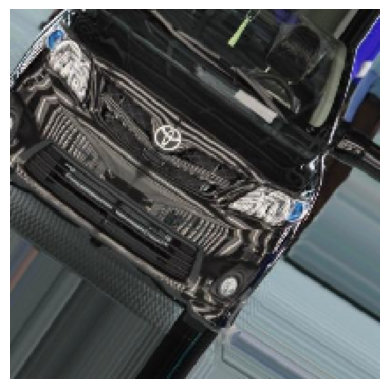

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model(r".\Models\model_resnet50_uncropped_final.h5")
img=image.load_img(r"E:\intel Internship\eAuto\test_uncropped\Toyota\aug_0_2249.jpeg",target_size=(210,210))

x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

#run model on image
r=model.predict(img_data)
print(r)
#find max probability from array
a=np.argmax(r, axis=1)
a
#print label of predicted car
# Class labels (replace with your own class labels)
class_labels = ['Ford', 'Honday', 'Hyundai', 'Nissan', 'Renault', 'Suzuki', 'Tata', 'Toyota', 'Volkswagen']

print(class_labels[a[0]])

# Display the image
plt.imshow(img)
plt.axis('off') # Remove axis ticks and labels
plt.show()


# Introduction

We chose these 3 models as the top performing from a few others.
1. ResNet50 on cropped logos.
2. VGG16 on cropped logos.
3. Resnet50 on uncropped logos.


# Observations 
On the same image(Renault front cropped), Resnet50 model predicted Nissan, whereas VGG16 predicted renault correctly.

Overall, due to the low-qaulity and unlabeled dataset, no model performs as well as we expected it to be. Therefore, unless a better, cleaner and labelled dataset is available, the prediction rate and accuracy of these models will not improve

Graphs for train loss and train accuracy are available for all three graphs above. 
From the above top 3 models it is apparent that VGG16 performs the best. It can predict a properly predicted image with good enough accuracy above 60%.
Whereas resnet50 on cropped images gave similar results too, but resnet on uncropped images gave lower accuracy

# Scope

If we are provided with a high-quality dataset of images, with many front facing cars in good quality visibility and all classes have a bigger number of these high quality images. We can train VGG16 to perform better by a huge margin. Due to the shortage of images to train on, we could not pump up the accuracy. 

# Conclusion 
If we absolutely have no other dataset and have to choose from these models, VGG16 would be the best choice.